In [1]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

/Users/Brian/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df = pd.read_csv("tuner_output/model_info.csv", sep=", ", engine='python')

In [3]:
df.sort_values('auc', ascending=False)

,c1_W_regularizer,c1_b_regularizer,c1_dropout,c1_filters,c1_width,c2_W_regularizer,c2_b_regularizer,c2_dropout,c2_filters,c2_width,d1_W_regularizer,d1_b_regularizer,d1_dropout,d1_size,embedding_W_regularizer,embedding_b_regularizer,embedding_dim,margin,auc
17,0.1000,0.1000,0.05,32,8,0.0001,0.0000,0.30,16,4,0.0010,0.1000,0.00,64,0.0010,0.0000,16,5,0.682939
8,0.0000,0.0100,0.10,8,4,0.1000,0.0100,0.00,32,16,0.0100,0.0100,0.05,64,0.0100,0.0010,16,5,0.664720
1,0.0001,0.1000,0.10,16,4,0.0100,0.1000,0.50,8,4,0.0001,0.0001,0.00,32,0.0100,0.0010,4,5,0.661592
18,0.0100,0.0100,0.05,16,4,0.0100,0.1000,0.00,16,16,0.1000,0.0010,0.05,258,0.0100,0.0001,4,5,0.659189
22,0.1000,0.0001,0.50,16,8,0.1000,0.0010,0.00,8,16,0.0010,0.0001,0.10,258,0.0100,0.0010,4,5,0.634649
11,0.1000,0.0100,0.10,16,16,0.0001,0.0001,0.00,32,4,0.0000,0.0100,0.00,258,0.0010,0.0100,4,2,0.633720
0,0.0010,0.0000,0.05,8,8,0.0010,0.0000,0.00,16,16,0.0010,0.0100,0.05,258,0.1000,0.0001,64,5,0.632253
4,0.1000,0.0010,0.10,8,16,0.0010,0.0010,0.00,32,16,0.1000,0.0001,0.00,128,0.0010,0.0001,64,1,0.605108
15,0.0100,0.0100,0.50,8,4,0.1000,0.1000,0.00,16,4,0.1000,0.0010,0.05,258,0.1000,0.1000,16,2,0.605036
13,0.0100,0.0100,0.00,8,16,0.1000,0.0000,0.10,16,8,0.0001,0.0000,0.00,258,0.1000,0.0100,4,2,0.587051


In [4]:
features = df.columns[0:-1]
X = df[features].values
y = df['auc'].values

In [5]:
rf = RandomForestRegressor()

In [6]:
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [7]:
rf.feature_importances_

array([  3.11314345e-02,   1.19980184e-02,   1.54614874e-03,
         1.48443811e-04,   1.67420438e-02,   1.22773686e-04,
         3.71178383e-03,   8.88867953e-03,   6.23822756e-02,
         6.62856068e-03,   5.90769183e-03,   2.58703570e-02,
         5.83741835e-02,   1.56716630e-01,   3.53260437e-03,
         7.10267844e-03,   2.94959535e-03,   5.96246097e-01])

([<matplotlib.axis.XTick at 0x1192ae090>,
 <a list of 18 Text xticklabel objects>)

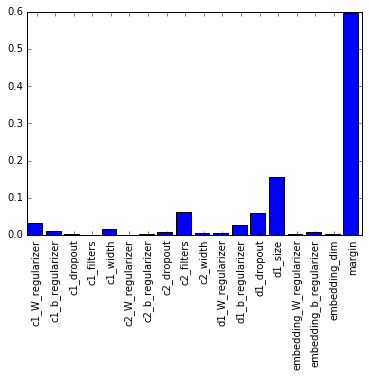

In [8]:
fig, ax = plt.subplots()
n_groups = len(features)
index = np.arange(n_groups)
plt.bar(index, rf.feature_importances_)
plt.xticks(index + 0.5, features, rotation=90)